# eyepacs 데이터 분석
- 1. 개 수
    - 1.1 전체 파일 개 수
    - 1.2 left right 개 수
    - 1.3 라벨 별 비율
    - 1.4 라벨 별 샘플
    
2. 이미지 크기 및 비율

In [1]:
from utils import get_all_paths, search_img_paths, get_names, paths2imgs, plot_images, paths2imgs, show_fundus
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os

%reload_ext autoreload
%autoreload 2

## 1.1 전체 파일 개 수

In [2]:
resize_dir = './datasets/resize_and_pad_256x256'
paths = get_all_paths(resize_dir)
img_paths = search_img_paths(paths)
n_imgs = len(img_paths)
print('이미지 개 수 : {}'.format(n_imgs))

이미지 개 수 : 0


## 1.2 left right 개 수

In [3]:
# right, left 분류
rights = []
lefts = []
names = get_names(img_paths)
_ = [rights.append(img_paths[index]) if 'right' in name else lefts.append(img_paths[index]) for index, name in enumerate(names)]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 1421.23it/s]


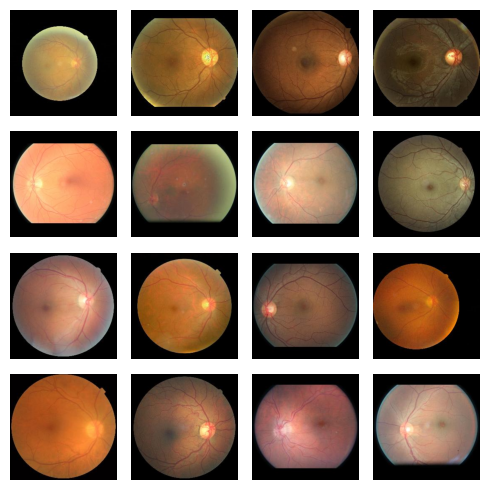

In [4]:
imgs = paths2imgs(rights[:16])
plot_images(imgs, fig_size=(5,5))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 453.29it/s]


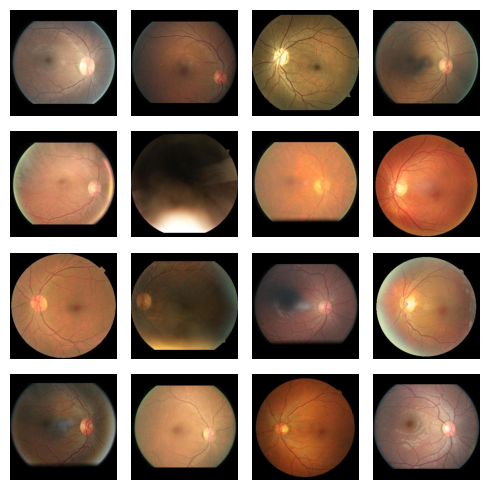

In [5]:
imgs = paths2imgs(lefts[:16])
plot_images(imgs, fig_size=(5,5))

In [6]:
n_right = len(rights)
n_left = len(lefts)
print('right : {}, left: {}'.format(n_right, n_left))

right : 17559, left: 17561


## 1.3 비율 조사

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64


<BarContainer object of 5 artists>

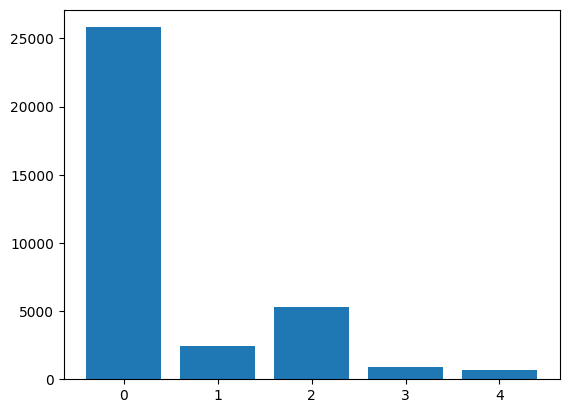

In [7]:
df = pd.read_csv('./datasets/trainLabels.csv')
label_counts = df.level.value_counts()
print(label_counts)
plt.bar(label_counts.index, label_counts.values)

In [8]:
df_image_path = df.image.map(lambda x: os.path.join(resize_dir, x+'.jpeg'))
tmp_df = df.copy()
tmp_df['path'] = df_image_path
df = tmp_df

## 1.4 각 라벨별 샘플

### 1.4.1 Level 0

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1670.11it/s]


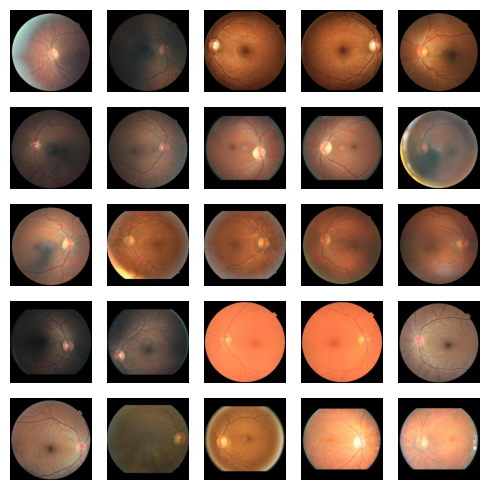

In [9]:
# label 이 0 인 path 을 추출합니다. 
show_fundus(df, 0, 25, fig_size=(5,5))

### 1.4.2 Level 1

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1729.98it/s]


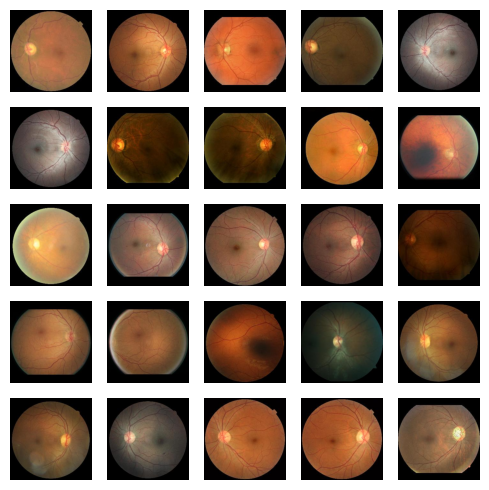

In [10]:
show_fundus(df, 1, 25, fig_size=(5,5))

### 1.4.3 Level 2

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1866.09it/s]


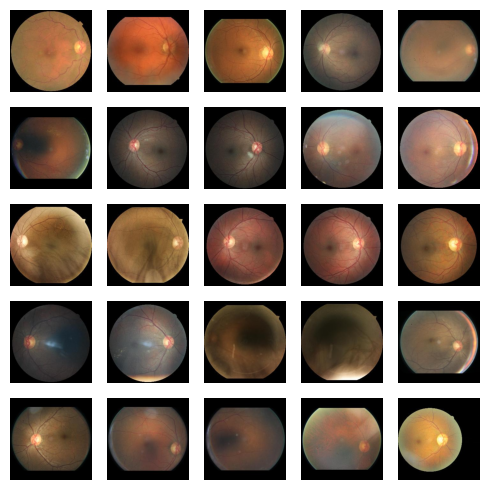

In [11]:
show_fundus(df, 2, 25, fig_size=(5,5))

### 1.4.4 Level 3

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1426.61it/s]


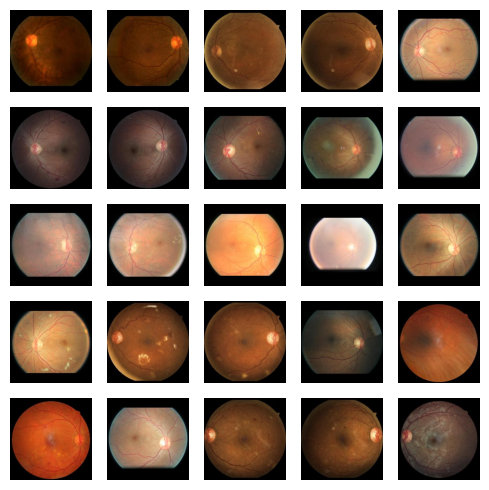

In [12]:
show_fundus(df, 3, 25, fig_size=(5,5))

### 1.4.5 Level 4

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1841.87it/s]


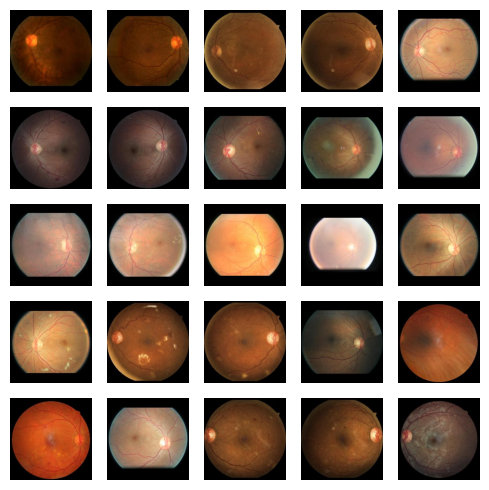

In [13]:
show_fundus(df, 3, 25, fig_size=(5,5))

In [32]:
import pandas as pd 

df = pd.read_csv('./datasets/trainLabels(binary).csv')
df.label.value_counts()

0    28253
1     6873
Name: label, dtype: int64

## 이미지 크기 및 비율
 - 원본 이미지 크기 및 비율 조사
 - left-right side padding 이 후 크기 조사
 - 256,256 resize and padding 이후 크기 조사

### .3 Resize and padding

In [9]:
imgs = paths2imgs(img_paths)
hs, ws = [], []
for img in tqdm(imgs):
    hs.append(np.array(img).shape[0])
    ws.append(np.array(img).shape[1])
h_w_ratio = np.array(hs) / np.array(ws)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35120/35120 [00:00<00:00, 39404.67it/s]


(array([    0.,     0.,     0.,     0.,     0., 35120.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

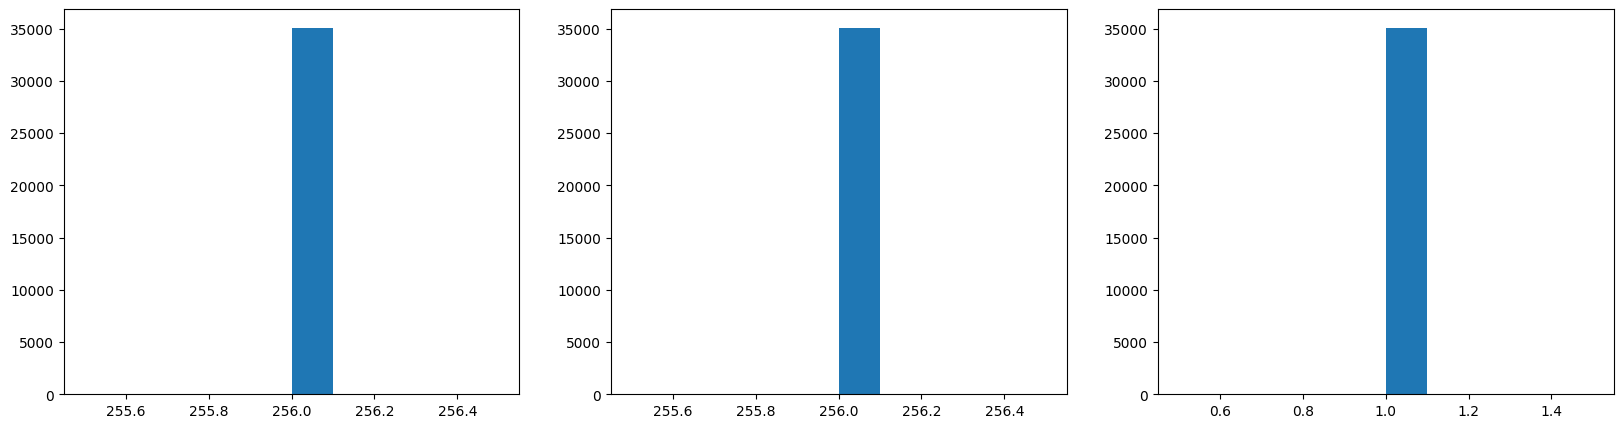

In [10]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(20,5)
axes[0].hist(hs)
axes[1].hist(ws)
axes[2].hist(h_w_ratio)